MILESTONE- 1

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
# 1.Load the dataset from the CSV file
print("Loading Data")
df = pd.read_csv('GlobalWeatherRepository.csv')
print("Data loaded successfully.")




Loading Data
Data loaded successfully.


In [29]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [30]:
#showing number of colums and rows
len(df.index)
len(df.columns)
df.shape

(88663, 41)

In [31]:
# 2. Initial Inspection of the Data
print("\n First 10 Rows")
print(df.head(10))

print("\n Data Types & Missing Values")
df.info()

print("\n Statistical Summary")
print(df.describe())


 First 10 Rows
               country     location_name  latitude  longitude  \
0          Afghanistan             Kabul     34.52      69.18   
1              Albania            Tirana     41.33      19.82   
2              Algeria           Algiers     36.76       3.05   
3              Andorra  Andorra La Vella     42.50       1.52   
4               Angola            Luanda     -8.84      13.23   
5  Antigua and Barbuda      Saint John's     17.12     -61.85   
6            Argentina      Buenos Aires    -34.59     -58.67   
7              Armenia           Yerevan     40.18      44.51   
8            Australia          Canberra    -35.28     149.22   
9              Austria            Vienna     48.20      16.37   

                         timezone  last_updated_epoch      last_updated  \
0                      Asia/Kabul          1715849100  2024-05-16 13:15   
1                   Europe/Tirane          1715849100  2024-05-16 10:45   
2                  Africa/Algiers          

In [32]:
# 3. Clen the data
print(f"Original dataset size: {df.shape[0]} rows")

# Get a summary of the 'wind_kph' column before cleaning
print("\n Summary Before Cleaning")
print(df['wind_kph'].describe())

# Filter the DataFrame to remove anomalies
df_cleaned = df[df['wind_kph'] < 500].copy()

# Get a summary of the 'wind_kph' column after cleaning
print("\n Summary After Cleaning")
print(df_cleaned['wind_kph'].describe())

print(f"\nCleaned dataset size: {df_cleaned.shape[0]} rows")

# Re-assign the cleaned data to the original DataFrame
df = df_cleaned

Original dataset size: 88663 rows

 Summary Before Cleaning
count    88663.000000
mean        13.342914
std         13.073780
min          3.600000
25%          6.500000
50%         11.200000
75%         18.400000
max       2963.200000
Name: wind_kph, dtype: float64

 Summary After Cleaning
count    88662.000000
mean        13.309643
std          8.531078
min          3.600000
25%          6.500000
50%         11.200000
75%         18.400000
max        272.200000
Name: wind_kph, dtype: float64

Cleaned dataset size: 88662 rows


In [33]:
# 4. Prepare for Time-Series Analysis: Convert date column
print("\nConverting 'last_updated' column to date time format")
df['last_updated'] = pd.to_datetime(df['last_updated'])
print("Conversion complete. Data type is now:", df['last_updated'].dtype)


Converting 'last_updated' column to date time format
Conversion complete. Data type is now: datetime64[ns]


In [34]:
# Define temperature bins and labels
bins = [-100, 0, 15, 30, 100] # Example ranges
labels = ['Freezing', 'Cold', 'Mild', 'Hot']

# Create a new column with temperature categories
df['temperature_category'] = pd.cut(df['temperature_celsius'], bins=bins, labels=labels, right=False)

# Display the new column
print("\n DataFrame with Temperature Categories")
print(df[['temperature_celsius', 'temperature_category']].head())


 DataFrame with Temperature Categories
   temperature_celsius temperature_category
0                 26.6                 Mild
1                 19.0                 Mild
2                 23.0                 Mild
3                  6.3                 Cold
4                 26.0                 Mild


In [35]:
# 5. Structure for Time-Series: Set datetime index
df.set_index('last_updated', inplace=True)
print("\n'last_updated' column has been set as the index.")


'last_updated' column has been set as the index.


In [36]:
# Group the data by country and calculate the average temperature
average_temp_by_country = df.groupby('country')['temperature_celsius'].mean()

# Display the aggregated data
print("\n Average Temperature per Country")
print(average_temp_by_country.head(50)) # Print the first 10 entries for a cleaner output


 Average Temperature per Country
country
Afghanistan                     21.272807
Albania                         23.005044
Algeria                         23.372967
Andorra                         12.241886
Angola                          26.664474
Antigua and Barbuda             26.784292
Argentina                       13.882159
Armenia                         20.502412
Australia                       11.912061
Austria                         15.851209
Azerbaijan                      20.750110
Bahamas                         25.296222
Bahrain                         31.634430
Bangladesh                      31.308590
Barbados                        27.335022
Belarus                         13.273026
Belgium                         14.241144
Belize                          22.913717
Benin                           29.085495
Bhutan                          13.261758
Bolivia                         17.100554
Bosnia and Herzegovina          16.678728
Botswana                        24

In [37]:
# Calculate average temperature by country and find the hottest/coldest
avg_temp_by_country = df_cleaned.groupby('country')['temperature_celsius'].mean()
hottest_countries = avg_temp_by_country.nlargest(5)
coldest_countries = avg_temp_by_country.nsmallest(5)

print("\nTop 5 Hottest Countries:")
print(hottest_countries)

print("\nTop 5 Coldest Countries:")
print(coldest_countries)


Top 5 Hottest Countries:
country
Saudi Arabien    45.000000
Marrocos         40.300000
Turkménistan     37.800000
Qatar            34.237363
Kuwait           34.035965
Name: temperature_celsius, dtype: float64

Top 5 Coldest Countries:
country
Iceland                     6.573465
Mongolia                    6.774670
Canada                      7.597351
United States of America    8.865111
Norway                      9.615604
Name: temperature_celsius, dtype: float64


In [38]:
# 6. Aggregate to Monthly Averages
print("\n Aggregating data to monthly averages")
columns_to_average = ['temperature_celsius', 'wind_kph', 'precip_mm', 'humidity']
monthly_averages = df.groupby('country')[columns_to_average].resample('ME').mean()
print("Aggregation complete.")

#Displaying the result in a table format

# Reset the index to turn the grouped data into a flat table
monthly_averages_table = monthly_averages.reset_index()

# Display the first 5 rows of the new aggregated table
monthly_averages_table.head()


 Aggregating data to monthly averages
Aggregation complete.


,country,last_updated,temperature_celsius,wind_kph,precip_mm,humidity
0,Afghanistan,2024-05-31,20.305882,11.517647,0.108824,38.058824
1,Afghanistan,2024-06-30,25.590000,17.110000,0.072667,24.833333
2,Afghanistan,2024-07-31,31.303448,20.731034,0.000345,17.931034
3,Afghanistan,2024-08-31,30.848387,20.196774,0.037097,20.548387
4,Afghanistan,2024-09-30,28.216667,12.223333,0.014333,13.733333


In [39]:
# 7. Display a sample of the result
print("\n Monthly Averages for India")
print(monthly_averages.loc['India'])


 Monthly Averages for India
              temperature_celsius   wind_kph  precip_mm   humidity
last_updated                                                      
2024-05-31              39.588235  10.282353   0.000000  20.764706
2024-06-30              38.200000  14.055172   0.097586  32.379310
2024-07-31              34.528571   9.960714   0.250000  60.428571
2024-08-31              32.041935  11.493548   0.204516  68.645161
2024-09-30              31.013333   9.166667   0.092667  71.266667
2024-10-31              34.716129   9.264516   0.000000  29.709677
2024-11-30              28.950000   7.010000   0.000000  31.566667
2024-12-31              21.880645   9.054839   0.003226  31.645161
2025-01-31              20.732258   9.729032   0.000968  47.774194
2025-02-28              25.100000  11.910714   0.000000  33.607143
2025-03-31              30.783871  12.500000   0.000000  23.064516
2025-04-30              37.520000   7.233333   0.027667  18.366667
2025-05-31              35.993548


 Generating Visualizations


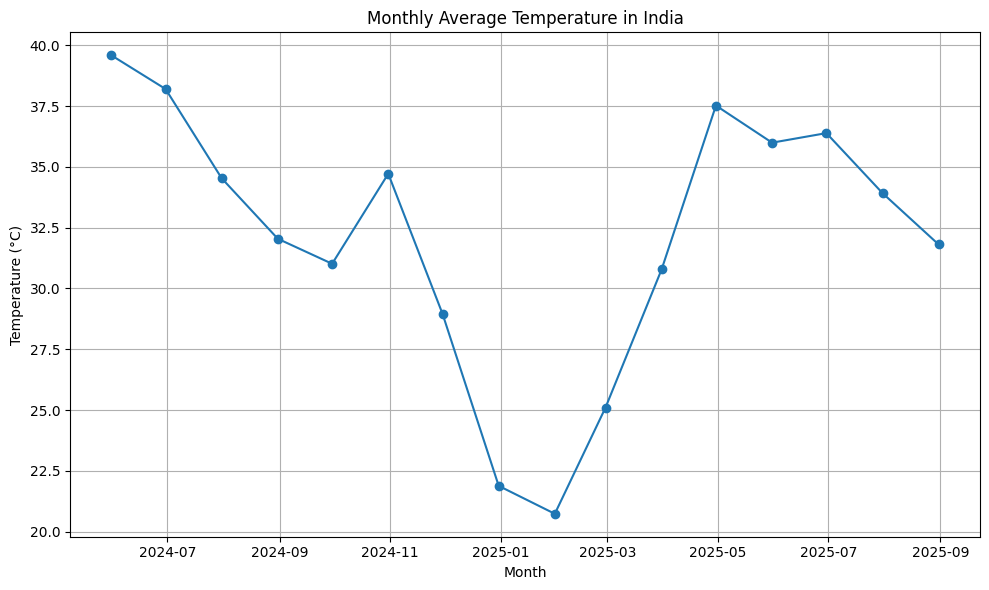

In [40]:
# 8. Data Visualization using Matplotlib
print("\n Generating Visualizations")

#Visualization 1: Line Chart for Temperature Trend in a Single Country 
# Select data for a specific country (India)
india_monthly_data = monthly_averages.loc['India']

plt.figure(figsize=(10, 6)) # Create a figure with a specific size
plt.plot(india_monthly_data.index, india_monthly_data['temperature_celsius'], marker='o', linestyle='-')
plt.title('Monthly Average Temperature in India')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout() # Adjust layout to make room for labels
plt.show()

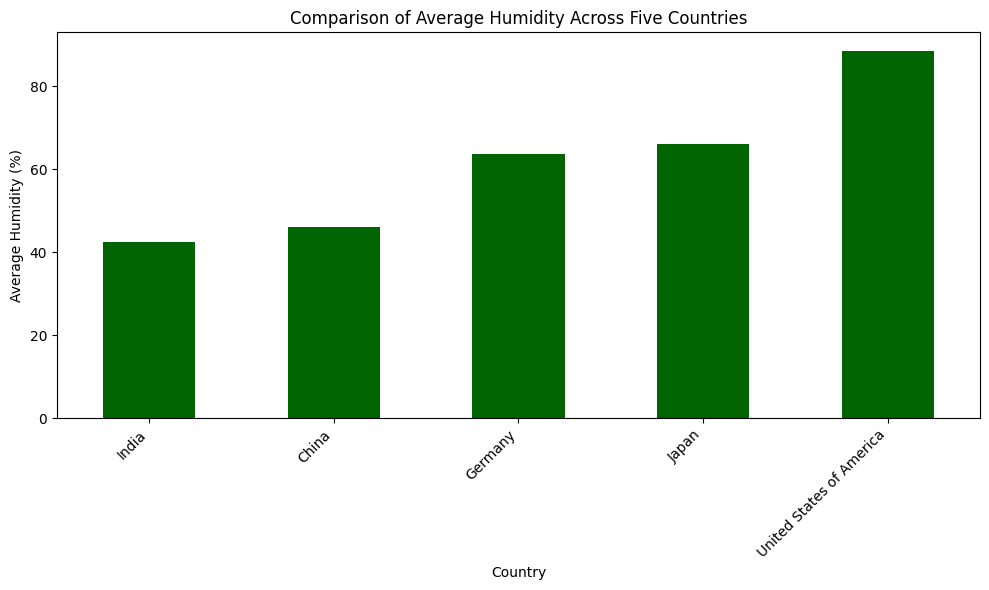

In [41]:
#  Visualization 2: Get the overall average humidity for a few sample countries
avg_humidity_by_country = monthly_averages.groupby('country')['humidity'].mean()
sample_countries = avg_humidity_by_country.loc[['India', 'United States of America', 'Germany', 'China', 'Japan']].sort_values()

plt.figure(figsize=(10, 6))
sample_countries.plot(kind='bar', color='darkgreen')
plt.title('Comparison of Average Humidity Across Five Countries')
plt.xlabel('Country')
plt.ylabel('Average Humidity (%)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


 Analyzing Weather Conditions for Pie Chart


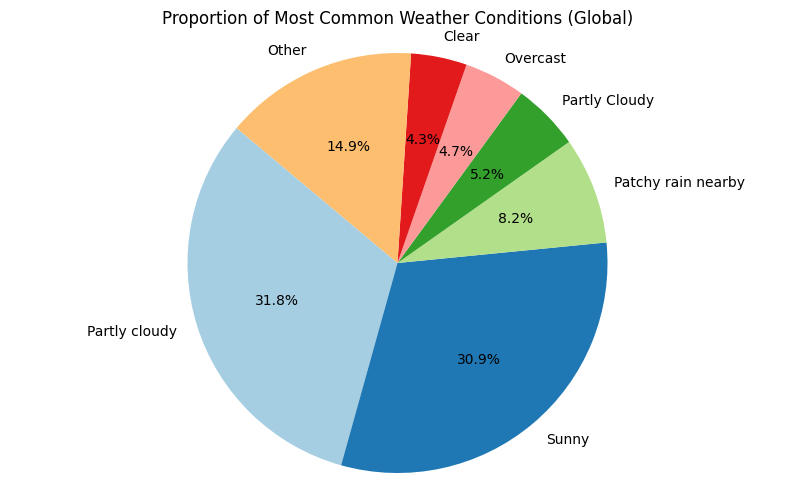


Visualizations generated successfully.


In [42]:
# Visualization 3: Pie Chart of Most Common Weather Conditions
# Use the original (unaggregated) dataframe for this
print("\n Analyzing Weather Conditions for Pie Chart")
condition_counts = df['condition_text'].value_counts()

# To make the pie chart readable, we'll group less common conditions into 'Other'
top_conditions = condition_counts.head(6)
other_count = condition_counts.iloc[6:].sum()
top_conditions['Other'] = other_count

plt.figure(figsize=(10, 6))
plt.pie(top_conditions, labels=top_conditions.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Most Common Weather Conditions (Global)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


print("\nVisualizations generated successfully.")

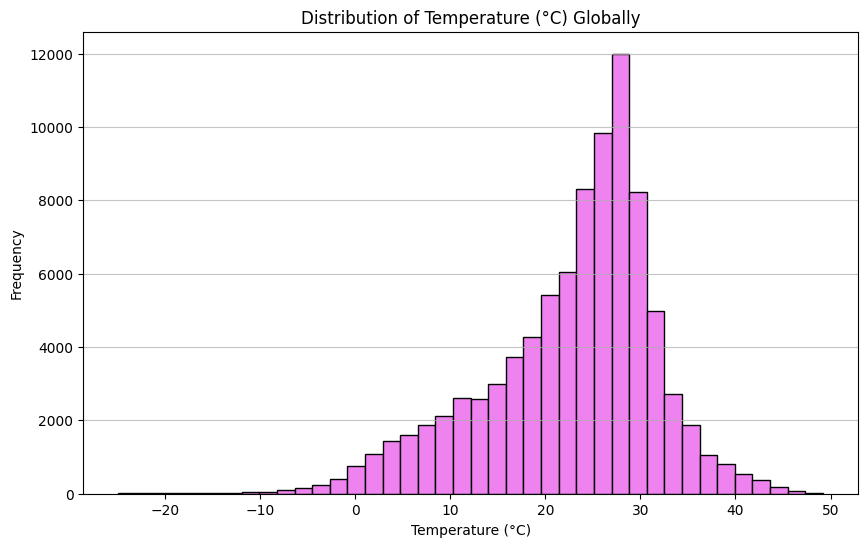

In [43]:
#Visualization 4: the distribution of temperatures using a histogram.
plt.figure(figsize=(10, 6))
plt.hist(df['temperature_celsius'], bins=40, color='violet', edgecolor='black')
plt.title('Distribution of Temperature (°C) Globally')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
#This helps us understand the most common temperature ranges and the overall spread of the data.plt.figure(figsize=(10, 6))

Milestone-1 Completed